## Business Understanding

Tim peneliti melakukan penelian ini dengan tujuan sebagai berikut :

*   Menemukan hubungan ke empat kolom mengenai `soil_moisture` dengan jumlah curah hujan harian
*   Pasangan kota yang dekat secara geografis
*   Mencari letak daerah berdasarkan kota
*   Mencari 3 kota yang memiliki rata-rata jumlah curah hujan tahunan tertinggi beserta nilainya







## Data Understanding



Dataset Meramal Cuaca (MC) terdiri atas dua data, yaitu `Data Harian` dan `Data Jam`. Data Harian memiliki **14730 baris** dan Data Jam memiliki **353520 baris**.


terdapat **17 kolom** pada data harian dan **27 kolom** pada data jam. detail kolom-kolom tersebut adalah sebagai berikut:

**Data harian:**

* `Id` - id cuaca
* `time` - Tanggal pencatatan
* `temperature_2m_max (°C)` - Temperatur udara tertinggi pada ketinggian 2 m di atas permukaan
* `temperature_2m_min (°C)` - Temperatur udara terendah pada ketinggian 2 m di atas permukaan
* `apparent_temperature_max (°C)` - Temperatur semu maksimum yang terasa
* `apparent_temperature_min (°C)` - Temperatur semu minimum yang terasa
* `sunrise (iso8601)` - Waktu matahariterbit pada hari itu dengan format ISO 8601
* `sunset (iso8601)` - Waktu mataharitenggelam pada hari itu dengan format ISO 8601
* `shortwave_radiation_sum (MJ/m²)` - Total radiasi matahari pada haritersebut
* `rain_sum (mm)` - Jumlah curah hujan pada hari tersebut - Target Regresi
* `snowfall` - Jumlah salju pada haritersebut
* `precipitation` - Jumlah curah hujan harian (termasuk hujan, hujan lebat, dan salju)
* `windspeed_10m_max (km/h)` - Kecepatan angin maksimum pada ketinggian 10 m
* `windgusts_10m_max (km/h)` - Kecepatan angin minimum pada ketinggian 10 m
* `winddirection_10m_dominant (°)` - Arah angin dominan pada haritersebut
* `city` - Nama kota yang tercatat
* `class` - Jenis/kelompok curah hujan harian - Target Klasifikasi

**Data Jam:**
* `time` - Tanggal dan jam pencatatan
* `temperature_2m (°C)` - Temperatur pada ketinggian 2 m
* `relativehumidity_2m (%)` - Kelembapan pada ketinggian 2 m
* `winddirection_100m (°)` - Arah angin pada ketinggian 100 m
* `windgusts_10m (km/h)` - Kecepatan angin ketika terdapat angin kencang
* `et0_fao_evapotranspiration (mm)` - Jumlah evapotranspirasi (evaporasi dan transpirasi) pada jam tersebut
* `vapor_pressure_deficit (kPa)` - Perbedaan tekanan uap air dari udara dengan tekanan uap air ketika udara tersaturasi
* `soil_temperature_0_to_7cm (°C)` - Rata-rata temperatur tanah pada kedalaman 0-7 cm
* `soil_temperature_7_to_28cm (°C)` - Rata-rata temperatur tanah pada kedalaman 7-28 cm
* `soil_temperature_28_to_100cm (°C)` - Rata-rata temperatur tanah pada kedalaman 28-100 cm
* `soil_temperature_100_to_255cm (°C)` - Rata-rata temperatur tanah pada kedalaman 100-255 cm
* `soil_moisture_0_to_7cm (m³/m³)` - Rata-rata kelembapan air pada tanah untuk kedalaman 0-7 cm
* `soil_moisture_7_to_28cm (m³/m³)` - Rata-rata kelembapan air pada tanah untuk kedalaman 7-28 cm
* `dewpoint_2m (°C)` - Titik embun; suhu ambang udara mengembun
* `apparent_temperature (°C)` - Temperatur semu yang dirasakan
* `pressure_msl (hPa)` - Tekanan udara pada ketinggian permukaan air laut rata-rata (mean sea level)
* `surface_pressure (hPa)` - Tekanan udara pada ketinggian permukaan daerah tersebut
* `snowfall (cm)` - Jumlah hujan salju pada jam tersebut
* `cloudcover_low (%)` - Persentase cloud cover pada awan sampai ketinggian 2 km
* `cloudcover_mid (%)` - Persentase cloud cover pada ketinggian 2-6 km
* `cloudcover_high (%)` - Persentase cloud cover pada ketinggian di atas 6 km
* `windspeed_10m (km/h)` - Kecepatan angin pada ketinggian 10 m
* `windspeed_100m (km/h)` - Kecepatan angin pada ketinggian 100 m
* `winddirection_10m (°)` - Arah angin pada ketinggian 10 m
* `soil_moisture_28_to_100cm (m³/m³)` - Rata-rata kelembapan air pada tanah untuk kedalaman 28-100 cm
* `soil_moisture_100_to_255cm (m³/m³)` - Rata-rata kelembapan air pada tanah untuk kedalaman 100-255 cm
* `city` - Nama kota

## Reading Data

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import re

from numpy import where
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold

from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

In [ ]:
# Download datasets
!gdown 1kcb-zkYu-UzAcLM2VfTBgZ8MsIvpdHlK
!gdown 14mTR39Y6NhFfAwz6m7q3JjAKJPQnmFlI
!gdown 1qRuVVEDUwjtZy_nzXfCOWXn5XdrhghHW
!gdown 1C7Ly2ZLslpzRnoS1rYXEXFtCcAJ_Rldm

Downloading...
From: https://drive.google.com/uc?id=1kcb-zkYu-UzAcLM2VfTBgZ8MsIvpdHlK
To: /content/train_jaman.csv
100% 53.8M/53.8M [00:01<00:00, 44.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=14mTR39Y6NhFfAwz6m7q3JjAKJPQnmFlI
To: /content/train_harian.csv
100% 1.98M/1.98M [00:00<00:00, 13.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qRuVVEDUwjtZy_nzXfCOWXn5XdrhghHW
To: /content/test_harian.csv
100% 630k/630k [00:00<00:00, 6.14MB/s]
Downloading...
From: https://drive.google.com/uc?id=1C7Ly2ZLslpzRnoS1rYXEXFtCcAJ_Rldm
To: /content/test_jaman.csv
100% 20.0M/20.0M [00:00<00:00, 64.7MB/s]


### Data Train

In [ ]:
# Convert csv to data frame.
df_train_harian = pd.read_csv('train_harian.csv')
df_train_harian.head()

,id,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),city,snowfall,precipitation,rain_sum (mm),class
0,0,2018-01-01 00:00:00,33.2,24.3,39.0,28.8,2018-01-01 05:41:14,2018-01-01 18:09:47,10.8,23.0,257.02213,23.82,B,0.0,1.800000,1.800000,Hujan Ringan
1,1,2018-01-02 00:00:00,33.0,25.1,40.0,29.2,2018-01-02 05:41:45,2018-01-02 18:10:12,9.5,19.4,230.53691,22.72,B,0.0,2.300000,2.300000,Hujan Ringan
2,2,2018-01-03 00:00:00,31.3,24.9,38.3,30.3,2018-01-03 05:42:14,2018-01-03 18:10:35,11.1,23.8,275.63590,22.92,B,0.0,11.099999,11.099999,Hujan Sedang
3,3,2018-01-04 00:00:00,31.2,25.9,37.8,31.8,2018-01-04 05:42:43,2018-01-04 18:10:58,11.0,31.7,241.11348,17.70,B,0.0,16.400000,16.400000,Hujan Sedang
4,4,2018-01-05 00:00:00,29.6,25.4,34.3,29.6,2018-01-05 05:43:12,2018-01-05 18:11:20,17.3,33.1,246.59671,9.61,B,0.0,10.800000,10.800000,Hujan Sedang


In [ ]:
df_train_harian.shape

(14730, 17)

In [ ]:
# Convert csv to data frame.
df_train_jaman = pd.read_csv('train_jaman.csv')
df_train_jaman.head()

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloudcover_low (%),cloudcover_mid (%),...,windgusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city
0,2018-01-01 00:00:00,25.4,91.0,23.9,30.6,0.0,1008.0,1005.8,7.0,10.0,...,9.4,28.1,28.4,28.3,28.7,0.326,0.315,0.282,0.27,B
1,2018-01-01 01:00:00,25.2,92.0,23.8,30.0,0.0,1007.4,1005.2,16.0,21.0,...,10.1,28.0,28.3,28.3,28.7,0.325,0.315,0.282,0.27,B
2,2018-01-01 02:00:00,25.1,92.0,23.8,29.8,0.0,1006.9,1004.7,7.0,8.0,...,14.8,28.0,28.2,28.3,28.7,0.324,0.315,0.283,0.27,B
3,2018-01-01 03:00:00,24.5,93.0,23.3,28.9,0.0,1006.0,1003.8,5.0,4.0,...,15.1,27.4,28.1,28.3,28.7,0.323,0.315,0.283,0.27,B
4,2018-01-01 04:00:00,24.3,94.0,23.3,28.9,0.0,1005.9,1003.7,2.0,3.0,...,14.0,27.2,28.0,28.3,28.7,0.322,0.315,0.283,0.27,B


In [ ]:
df_train_jaman.shape

(353520, 27)

In [ ]:
#Menggabungkan dua dataset
merged_df = pd.merge(df_train_harian, df_train_jaman, how='inner')

###Data Test

In [ ]:
# Convert csv to data frame.
df_test_harian = pd.read_csv('test_harian.csv')
df_test_harian.head()

,id,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),city,snowfall,precipitation
0,14730,2022-01-01 00:00:00,32.2,24.9,37.8,29.1,2022-01-01 05:41:13,2022-01-01 18:09:45,13.0,34.2,170.34824,21.45,B,0.0,4.1
1,14731,2022-01-02 00:00:00,31.4,24.4,37.1,28.9,2022-01-02 05:41:42,2022-01-02 18:10:09,13.2,30.2,191.20710,19.96,B,0.0,0.9
2,14732,2022-01-03 00:00:00,32.7,23.0,39.2,26.9,2022-01-03 05:42:11,2022-01-03 18:10:33,8.9,18.4,214.56248,25.28,B,0.0,0.3
3,14733,2022-01-04 00:00:00,31.6,24.4,38.8,28.6,2022-01-04 05:42:40,2022-01-04 18:10:55,8.4,19.1,351.72420,24.54,B,0.0,1.3
4,14734,2022-01-05 00:00:00,31.6,24.5,37.5,29.3,2022-01-05 05:43:10,2022-01-05 18:11:17,10.5,20.2,141.12420,22.78,B,0.0,4.4


In [ ]:
df_test_harian.shape

(5460, 15)

In [ ]:
# Convert csv to data frame.
df_test_jaman = pd.read_csv('test_jaman.csv')
df_test_jaman.head()

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloudcover_low (%),cloudcover_mid (%),...,windgusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city
0,2022-01-01 00:00:00,26.2,87.0,23.9,31.1,0.0,1011.1,1008.9,1.0,22.0,...,15.8,27.9,28.1,28.1,28.3,0.327,0.330,0.333,0.317,B
1,2022-01-01 01:00:00,25.9,89.0,23.9,30.9,0.0,1010.6,1008.4,1.0,38.0,...,15.5,27.9,28.0,28.1,28.3,0.326,0.330,0.333,0.317,B
2,2022-01-01 02:00:00,25.7,89.0,23.8,30.4,0.0,1009.9,1007.7,0.0,25.0,...,13.3,27.8,27.9,28.1,28.3,0.326,0.330,0.333,0.317,B
3,2022-01-01 03:00:00,25.0,92.0,23.5,29.3,0.0,1009.4,1007.2,2.0,9.0,...,14.8,27.1,27.8,28.1,28.3,0.326,0.329,0.333,0.317,B
4,2022-01-01 04:00:00,24.9,91.0,23.4,29.1,0.0,1009.3,1007.1,1.0,9.0,...,14.8,27.0,27.8,28.0,28.3,0.325,0.329,0.333,0.317,B


In [ ]:
df_test_jaman.shape

(131040, 27)

In [ ]:
#Menggabungkan dua dataset
merged_test = pd.merge(df_test_harian, df_test_jaman, how='inner')

## Exploratory Data Analysis (EDA)

### 1. Bagaimana hubungan ke empat kolom mengenai `soil_moisture` dengan jumlah curah hujan harian?

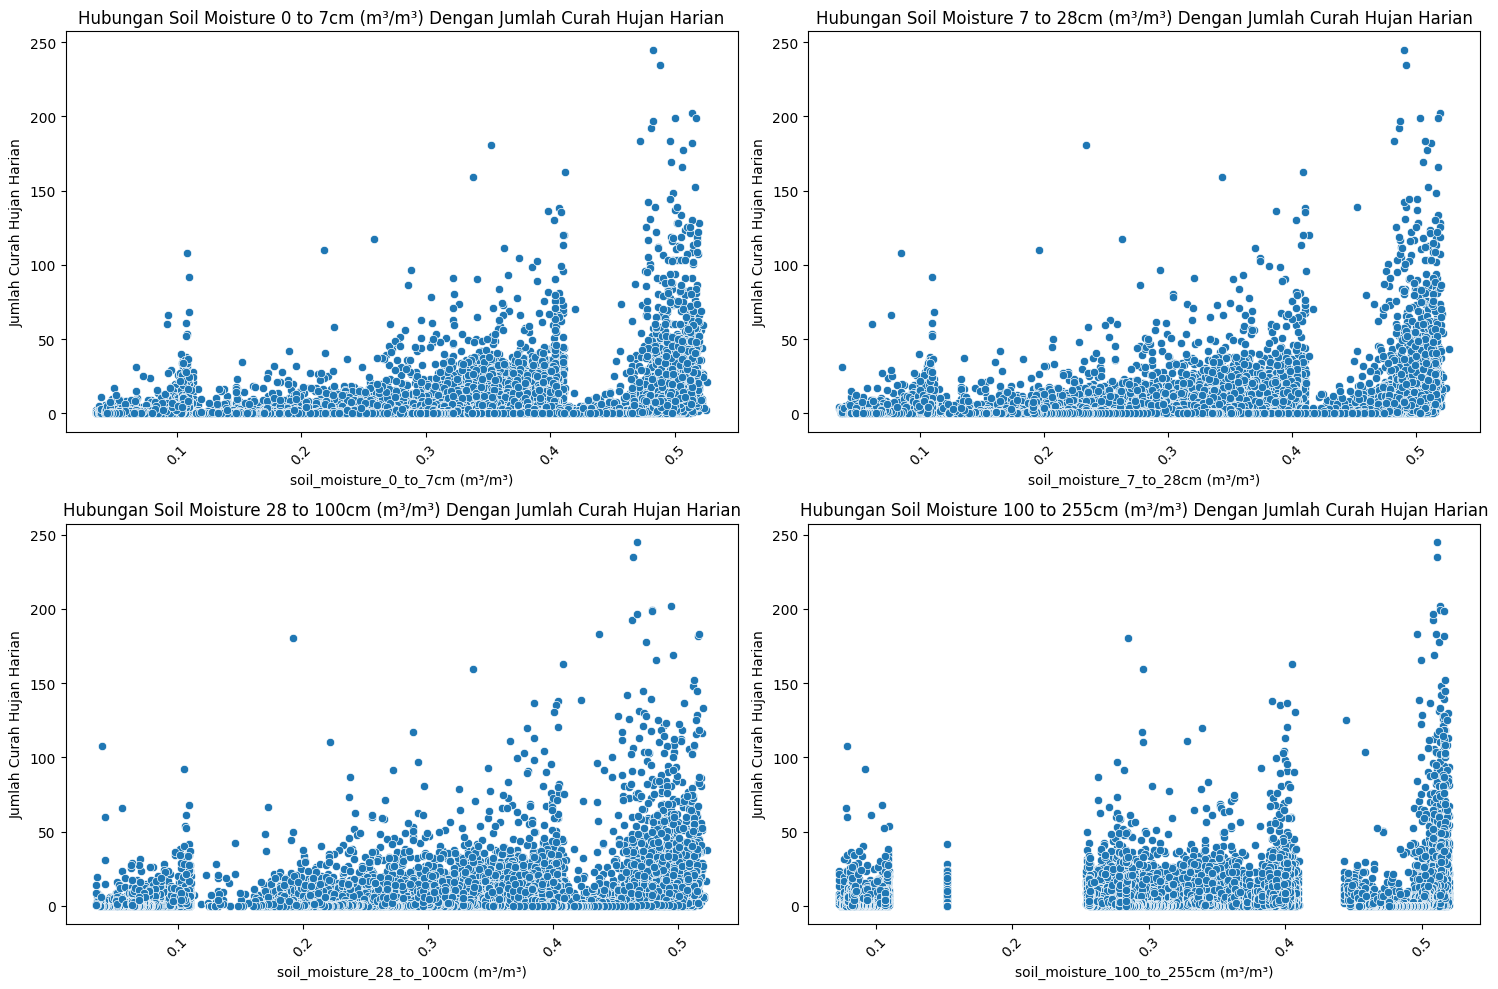

In [ ]:
#Melihat Korelasi Menggunakan Scatterplot
soil_moisture_cols = ['soil_moisture_0_to_7cm (m³/m³)', 'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)', 'soil_moisture_100_to_255cm (m³/m³)']
titles = ['Hubungan Soil Moisture 0 to 7cm (m³/m³) Dengan Jumlah Curah Hujan Harian',
          'Hubungan Soil Moisture 7 to 28cm (m³/m³) Dengan Jumlah Curah Hujan Harian',
          'Hubungan Soil Moisture 28 to 100cm (m³/m³) Dengan Jumlah Curah Hujan Harian',
          'Hubungan Soil Moisture 100 to 255cm (m³/m³) Dengan Jumlah Curah Hujan Harian']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes = axes.flatten()

for i, variable in enumerate(soil_moisture_cols):
    sns.scatterplot(x=variable, y='rain_sum (mm)', data=merged_df, ax=axes[i])
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Jumlah Curah Hujan Harian')
    axes[i].set_title(titles[i])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

In [ ]:
columns = ['soil_moisture_0_to_7cm (m³/m³)', 'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)', 'soil_moisture_100_to_255cm (m³/m³)', 'rain_sum (mm)']
merged_df[columns].corr(method='pearson')

,soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),rain_sum (mm)
soil_moisture_0_to_7cm (m³/m³),1.000000,0.989668,0.956107,0.925348,0.349409
soil_moisture_7_to_28cm (m³/m³),0.989668,1.000000,0.974776,0.933696,0.343136
soil_moisture_28_to_100cm (m³/m³),0.956107,0.974776,1.000000,0.958504,0.318679
soil_moisture_100_to_255cm (m³/m³),0.925348,0.933696,0.958504,1.000000,0.279439
rain_sum (mm),0.349409,0.343136,0.318679,0.279439,1.000000


> Dari scatterplot dan tabel korelasi di atas, dapat kita ambil kesimpulan bahwa keempat kolom soil moisture memiliki hubungan korelasi yang kuat satu sama lain. Hal ini tidak kita inginkan dalam pelatihan model, karena akan membuat informasi menjadi redundan dan dapat menyebabkan overfit. Oleh karena itu, apabila ingin menggunakan soil moisture sebagai fitur, cukup kita pilih salah satu.  
Adapun hubungan antara keempat kolom soil moisture dengan curah hujan terbilang cukup rendah, sehingga perlu kita pertimbangkan apakah akan menggunakan kolom soil moisture sebagai fitur.

### 2. Apakah ada beberapa kota yang dekat secara geografisnya?

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14730 entries, 0 to 14729
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  14730 non-null  int64  
 1   time                                14730 non-null  object 
 2   temperature_2m_max (°C)             14730 non-null  object 
 3   temperature_2m_min (°C)             14730 non-null  float64
 4   apparent_temperature_max (°C)       14730 non-null  float64
 5   apparent_temperature_min (°C)       14730 non-null  float64
 6   sunrise (iso8601)                   14730 non-null  object 
 7   sunset (iso8601)                    14730 non-null  object 
 8   windspeed_10m_max (km/h)            14730 non-null  float64
 9   windgusts_10m_max (km/h)            14730 non-null  float64
 10  winddirection_10m_dominant (°)      14730 non-null  float64
 11  shortwave_radiation_sum (MJ/m²)     14730

In [ ]:
merged_df.head()

,id,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),windspeed_10m_max (km/h),windgusts_10m_max (km/h),...,winddirection_100m (°),windgusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,0,2018-01-01 00:00:00,33.2,24.3,39.0,28.8,2018-01-01 05:41:14,2018-01-01 18:09:47,10.8,23.0,...,245.0,9.4,28.1,28.4,28.3,28.7,0.326,0.315,0.282,0.27
1,1,2018-01-02 00:00:00,33.0,25.1,40.0,29.2,2018-01-02 05:41:45,2018-01-02 18:10:12,9.5,19.4,...,229.0,15.1,28.3,28.7,28.3,28.7,0.314,0.308,0.282,0.27
2,2,2018-01-03 00:00:00,31.3,24.9,38.3,30.3,2018-01-03 05:42:14,2018-01-03 18:10:35,11.1,23.8,...,148.0,8.3,28.0,28.8,28.4,28.7,0.314,0.304,0.281,0.27
3,3,2018-01-04 00:00:00,31.2,25.9,37.8,31.8,2018-01-04 05:42:43,2018-01-04 18:10:58,11.0,31.7,...,153.0,4.0,28.6,28.8,28.5,28.8,0.326,0.313,0.281,0.27
4,4,2018-01-05 00:00:00,29.6,25.4,34.3,29.6,2018-01-05 05:43:12,2018-01-05 18:11:20,17.3,33.1,...,221.0,13.3,28.6,28.6,28.5,28.7,0.345,0.335,0.286,0.27


> Dengan dugaan awal bahwa kedekatan geografis sebuah kota dapat dilihat dari waktu terbitnya matahari yang berdekatan, maka kita buat sebuah dataframe baru yang berisi informasi kota dan waktu terbitnya matahari.

In [ ]:
#Melihat kota - kota yang tercatat pada dataset
unique_city_harian = df_train_harian['city'].unique()
print(unique_city_harian)

['B' 'K' 'Sh' 'Kw' 'L' 'U' 'S' 'T' 'P' 'M']


In [ ]:
sunrise_df = merged_df[['sunrise (iso8601)', 'city']]
sunrise_df = sunrise_df[sunrise_df['sunrise (iso8601)'] > '2023-04-10'].sort_values(by='sunrise (iso8601)', ascending=False)
sunrise_df

,sunrise (iso8601),city
11783,2023-04-14 17:59:14,T
2945,2023-04-14 14:04:08,K
14729,2023-04-14 06:32:35,M
7364,2023-04-14 06:24:28,L
1472,2023-04-14 05:53:12,B
10310,2023-04-14 05:22:03,S
8837,2023-04-14 05:21:36,U
13256,2023-04-14 05:10:50,P
5891,2023-04-14 03:59:36,Kw
4418,2023-04-14 03:08:25,Sh


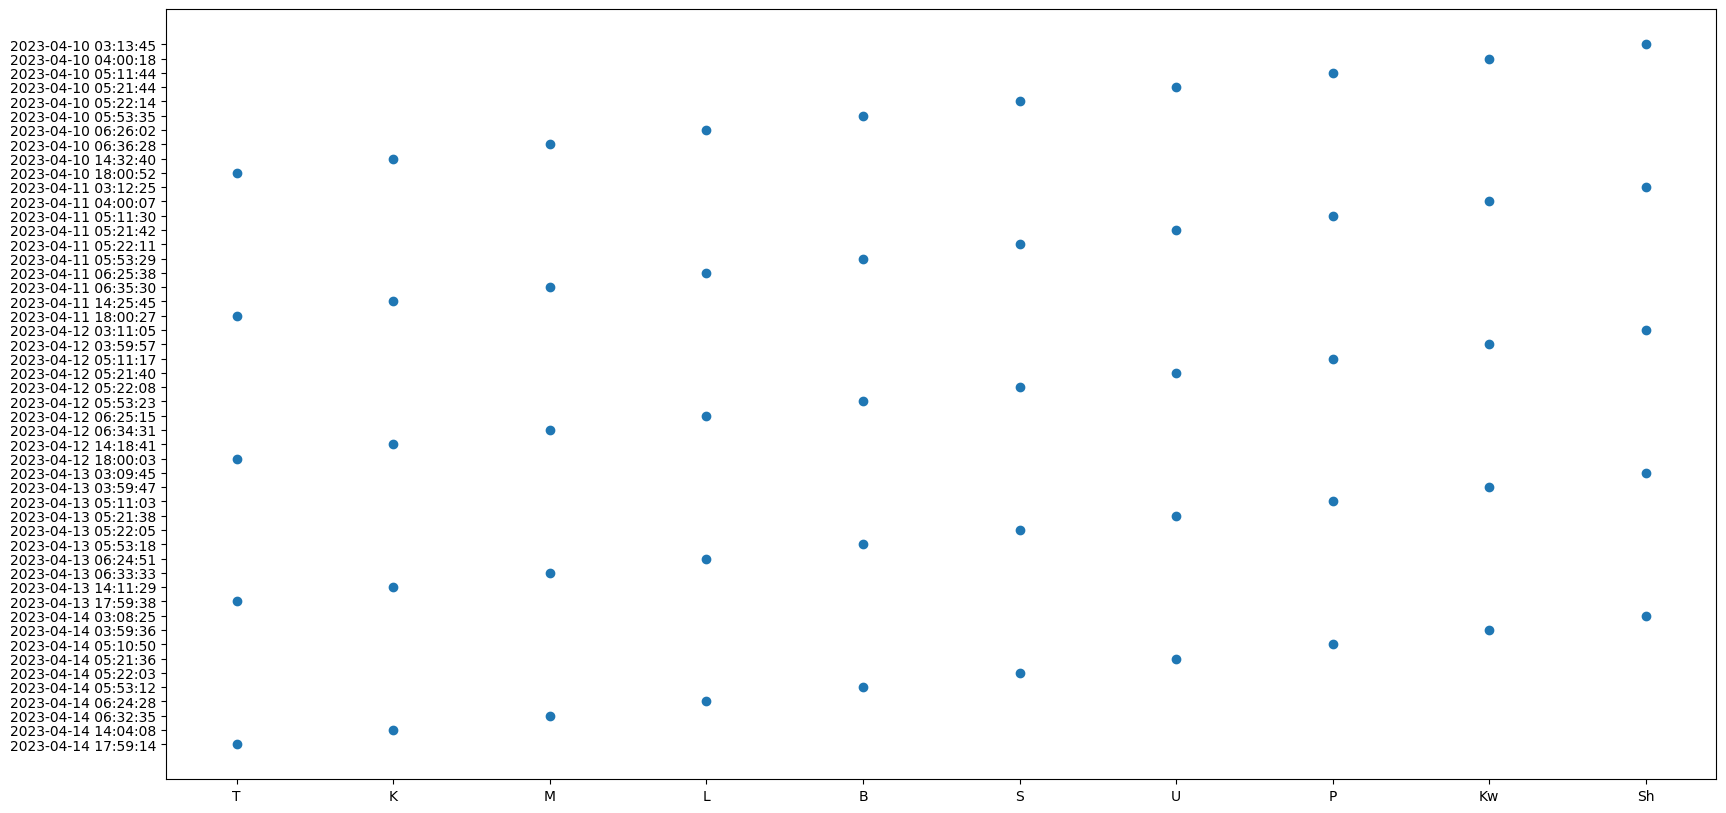

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(y=sunrise_df['sunrise (iso8601)'], x=sunrise_df['city'])
plt.show()

> Kita lihat dari scatter plot di atas, bahwa terdapat beberapa kota yang waktu matahari terbitnya berdekatan, diantaranya:
1. Kota P dengan kota U selisih +- 10 menit
2. Kota U dengan kota S selisih +- 1 menit
3. Kota L dengan kota M selisih +- 10 menit  

>Dengan demikian, bisa jadi beberapa kota yang disebutkan di atas memiliki letak geografis yang berdekatan.

### 4. Eksplorasi 3 kota yang memiliki rata-rata jumlah curah hujan tahunan tertinggi beserta nilainya!


In [ ]:
# Ambil data curah hujan, kota, dan wa
curah_hujan_per_kota = merged_df[['time','rain_sum (mm)', 'city']]
curah_hujan_per_kota

,time,rain_sum (mm),city
0,2018-01-01 00:00:00,1.800000,B
1,2018-01-02 00:00:00,2.300000,B
2,2018-01-03 00:00:00,11.099999,B
3,2018-01-04 00:00:00,16.400000,B
4,2018-01-05 00:00:00,10.800000,B
...,...,...,...
14725,2023-04-10 00:00:00,0.200000,M
14726,2023-04-11 00:00:00,0.000000,M
14727,2023-04-12 00:00:00,0.000000,M
14728,2023-04-13 00:00:00,0.000000,M


In [ ]:
# ganti atribut time dengan informasi tahun saja
curah_hujan_per_kota['year'] = pd.DatetimeIndex(curah_hujan_per_kota['time']).year

<ipython-input-86-fae202179718>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curah_hujan_per_kota['year'] = pd.DatetimeIndex(curah_hujan_per_kota['time']).year


In [ ]:
# drop time
curah_hujan_per_kota = curah_hujan_per_kota.drop('time', axis=1)

In [ ]:
curah_hujan_per_kota.groupby(['city', 'year']).mean()

rain_sum (mm)
city year               
B    2018       4.784110
     2019       5.079452
     2020       7.250273
     2021       6.823288
     2022       7.460000
     2023       2.057143
K    2018       0.475342
     2019       0.220548
     2020       0.226776
     2021       0.761644
     2022       5.719999
     2023       0.000000
Kw   2018      10.527671
     2019       9.425205
     2020      10.557104
     2021      11.343836
     2022       4.500000
     2023       5.414286
L    2018       4.169863
     2019       3.406575
     2020       5.287978
     2021       5.013973
     2022       4.940000
     2023       0.471429
M    2018       9.078356
     2019      11.489041
     2020      13.126776
     2021       9.307671
     2022      77.779998
     2023       0.028571
P    2018       7.596986
     2019       4.916986
     2020       7.850820
     2021       8.092329
     2022      10.720000
     2023      10.785714
S    2018       6.154795
     2019       5.847945
     2020       7.257377
     2021       8.342192
     2022      13.540001
     2023       5.214286
Sh   2018       3.895890
     2019       4.595616
     2020       4.251912
     2021       4.818904
     2022       2.360000
     2023       1.914286
T    2018      17.414794
     2019      15.526028
     2020      20.460109
     2021      21.287123
     2022      48.680001
     2023       7.928572
U    2018       4.905479
     2019       3.598904
     2020       4.505738
     2021       5.543836
     2022       5.880000
     2023       4.514286

In [ ]:
# menghitung rata2 curah hujan tahunan tiap kota
# hitung rata2 curah hujan per tahun terlebih dahulu, kemudian baru hitung rata2 curah hujan tahunan
curah_hujan_per_kota.groupby(['city', 'year']).mean().groupby(['city']).mean().sort_values(by='rain_sum (mm)', ascending=False)

,rain_sum (mm)
city,
T,21.882771
M,20.135069
Kw,8.628017
P,8.327139
S,7.726099
B,5.575711
U,4.824707
L,3.881636
Sh,3.639435


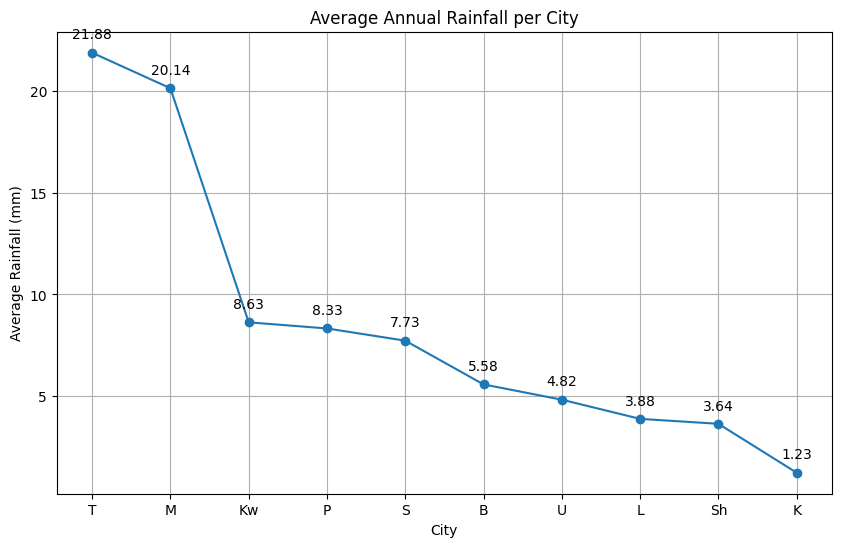

In [ ]:
cities = ['T', 'M', 'Kw', 'P', 'S', 'B', 'U', 'L', 'Sh', 'K']
rainfall_values = [21.882771, 20.135069, 8.628017, 8.327139, 7.726099, 5.575711, 4.824707, 3.881636, 3.639435, 1.234052]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(cities, rainfall_values, marker='o', linestyle='-')

# Add labels and title
plt.title('Average Annual Rainfall per City')
plt.xlabel('City')
plt.ylabel('Average Rainfall (mm)')

# Display the values on each data point
for i, txt in enumerate(rainfall_values):
    plt.annotate(f'{txt:.2f}', (cities[i], rainfall_values[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Show the plot
plt.grid(True)
plt.show()

> Dari hasil perhitungan di atas didapat bahwa 3 kota dengan curah hujan tahunan tertinggi adalah:
1. Kota T (21.882)
2. Kota M (20.135)
3. Kota Kw (8.628)

### 5. Rata - Rata Snowfall Berdasarkan City

In [ ]:
# Analysis
df_p = merged_df.copy()

p_by_city = df_p.groupby('city', as_index=False)['snowfall (cm)'].mean()
p_by_city

,city,snowfall (cm)
0,B,0.000000
1,K,0.024426
2,Kw,0.000000
3,L,0.000000
4,M,0.000000
5,P,0.000000
6,S,0.000000
7,Sh,0.000095
8,T,0.000000
9,U,0.000000


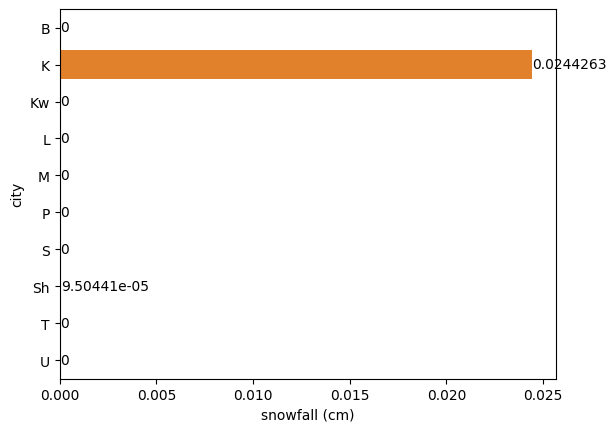

In [ ]:
# Visualization
ax = sns.barplot(
    data=p_by_city,
    x='snowfall (cm)',
    y='city',
    errorbar=None,
)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Terlihat bahwa kota yang memiliki nilai snowfall adalah kota K dan Sh dengan nilai snowfall (cm) tertinggi ada pada kota K

### 6. Rata - Rata Surface Pressure Berdasarkan Kota

In [ ]:
# Analysis
df_rs = merged_df.copy()

rs_by_city = df_rs.groupby('city', as_index=False)['surface_pressure (hPa)'].mean()
rs_by_city

,city,surface_pressure (hPa)
0,B,1008.935302
1,K,1006.940122
2,Kw,1007.896470
3,L,1010.455669
4,M,858.414664
5,P,1009.612356
6,S,1010.402444
7,Sh,1011.855329
8,T,1006.158520
9,U,987.667617


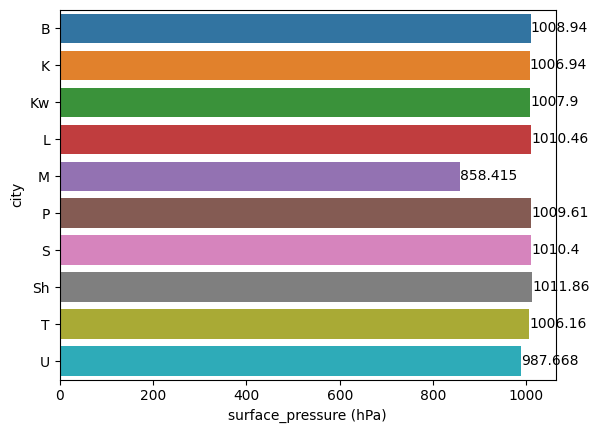

In [ ]:
# Visualization
ax = sns.barplot(
    data=rs_by_city,
    x='surface_pressure (hPa)',
    y='city',
    errorbar=None,
)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Dari bar chart di atas, terlihat bahwa rata - rata surface pressure tertinggi berada di kota Sh.

###7. Hubungan Antara Temperatur dengan Kota Pilihan Terhadap Jumlah Curah Hujan




In [ ]:
df_temp = merged_df.copy()

selected_cities = ['T', 'M', 'Kw']

df_temp = df_temp[df_temp['city'].isin(selected_cities)]

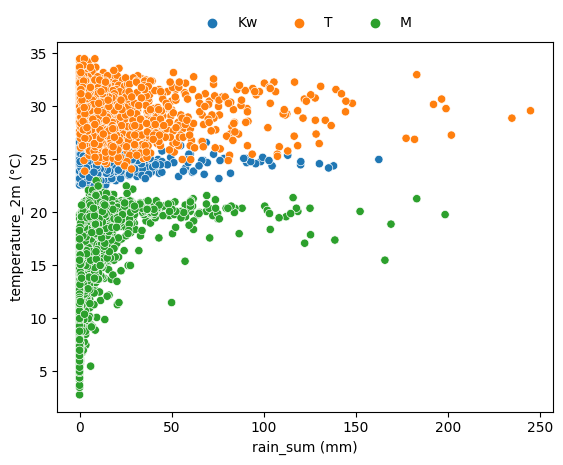

In [ ]:
# Visualization
ax = sns.scatterplot(
    data=df_temp[['city', 'temperature_2m (°C)','rain_sum (mm)']],
    x="rain_sum (mm)", y="temperature_2m (°C)",
    hue="city"
)

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

## Data Preprocessing

### Missing Values

#### Check Missing Values

In [ ]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])

    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [ ]:
check_values(merged_df)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.00,14730,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,time,object,0,0.00,1473,"[2018-01-01 00:00:00, 2018-01-02 00:00:00, 201..."
2,temperature_2m_max (°C),object,0,0.00,989,"[33.2, 33.0, 31.3, 31.2, 29.6, 31.1, 30.0, 29...."
3,temperature_2m_min (°C),float64,0,0.00,586,"[24.3, 25.1, 24.9, 25.9, 25.4, 24.7, 25.3, 23...."
4,apparent_temperature_max (°C),float64,0,0.00,761,"[39.0, 40.0, 38.3, 37.8, 34.3, 35.7, 34.6, 36...."
5,apparent_temperature_min (°C),float64,0,0.00,701,"[28.8, 29.2, 30.3, 31.8, 29.6, 28.5, 29.5, 30...."
6,sunrise (iso8601),object,0,0.00,13917,"[2018-01-01 05:41:14, 2018-01-02 05:41:45, 201..."
7,sunset (iso8601),object,0,0.00,13881,"[2018-01-01 18:09:47, 2018-01-02 18:10:12, 201..."
8,windspeed_10m_max (km/h),float64,0,0.00,442,"[10.8, 9.5, 11.1, 11.0, 17.3, 16.1, 15.0, 14.1..."
9,windgusts_10m_max (km/h),float64,0,0.00,231,"[23.0, 19.4, 23.8, 31.7, 33.1, 38.9, 29.5, 29...."


In [ ]:
check_values(merged_test)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.00,5460,"[14730, 14731, 14732, 14733, 14734, 14735, 147..."
1,time,object,0,0.00,546,"[2022-01-01 00:00:00, 2022-01-02 00:00:00, 202..."
2,temperature_2m_max (°C),float64,0,0.00,540,"[32.2, 31.4, 32.7, 31.6, 30.7, 32.5, 31.3, 30...."
3,temperature_2m_min (°C),float64,0,0.00,502,"[24.9, 24.4, 23.0, 24.5, 24.7, 24.1, 24.6, 25...."
4,apparent_temperature_max (°C),float64,0,0.00,647,"[37.8, 37.1, 39.2, 38.8, 37.5, 37.4, 37.6, 37...."
5,apparent_temperature_min (°C),float64,0,0.00,607,"[29.1, 28.9, 26.9, 28.6, 29.3, 30.2, 28.8, 29...."
6,sunrise (iso8601),object,0,0.00,5153,"[2022-01-01 05:41:13, 2022-01-02 05:41:42, 202..."
7,sunset (iso8601),object,0,0.00,5153,"[2022-01-01 18:09:45, 2022-01-02 18:10:09, 202..."
8,windspeed_10m_max (km/h),float64,0,0.00,360,"[13.0, 13.2, 8.9, 8.4, 10.5, 12.9, 15.1, 12.2,..."
9,windgusts_10m_max (km/h),float64,0,0.00,187,"[34.2, 30.2, 18.4, 19.1, 20.2, 25.9, 29.9, 24...."


#### Handle Missing Values

In [ ]:
# Menghapus atribut pada data train yang memiliki nilai null dalam jumlah besar
merged_df.drop(['precipitation' , 'snowfall'], axis=1, inplace=True)

In [ ]:
# Menghapus atribut pada data test yang memiliki nilai null dalam jumlah besar
merged_test.drop(['precipitation' , 'snowfall'], axis=1, inplace=True)

In [ ]:
# Mengecek nilai null
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [ ]:
check_null(merged_df)

Tidak ditemukan missing value pada dataset


In [ ]:
check_null(merged_test)

Tidak ditemukan missing value pada dataset


### Duplicate Values

#### Check Duplicate Values

In [ ]:
#Mengecek Nilai Duplikat pada data train
merged_df.duplicated()
print("Jumlah duplikasi data : " + str(merged_df.duplicated().sum()))

Jumlah duplikasi data : 0


In [ ]:
#Mengecek Nilai Duplikat pada data test
merged_test.duplicated()
print("Jumlah duplikasi data : " + str(merged_df.duplicated().sum()))

Jumlah duplikasi data : 0


### Outliers

#### Check Outliers

In [ ]:
num_df = merged_df.select_dtypes(include=['int64', 'float64'])
print(num_df.columns)

Index(['id', 'temperature_2m_min (°C)', 'apparent_temperature_max (°C)',
       'apparent_temperature_min (°C)', 'windspeed_10m_max (km/h)',
       'windgusts_10m_max (km/h)', 'winddirection_10m_dominant (°)',
       'shortwave_radiation_sum (MJ/m²)', 'rain_sum (mm)',
       'temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'apparent_temperature (°C)', 'snowfall (cm)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
       'cloudcover_high (%)', 'et0_fao_evapotranspiration (mm)',
       'vapor_pressure_deficit (kPa)', 'windspeed_10m (km/h)',
       'windspeed_100m (km/h)', 'winddirection_10m (°)',
       'winddirection_100m (°)', 'windgusts_10m (km/h)',
       'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_t

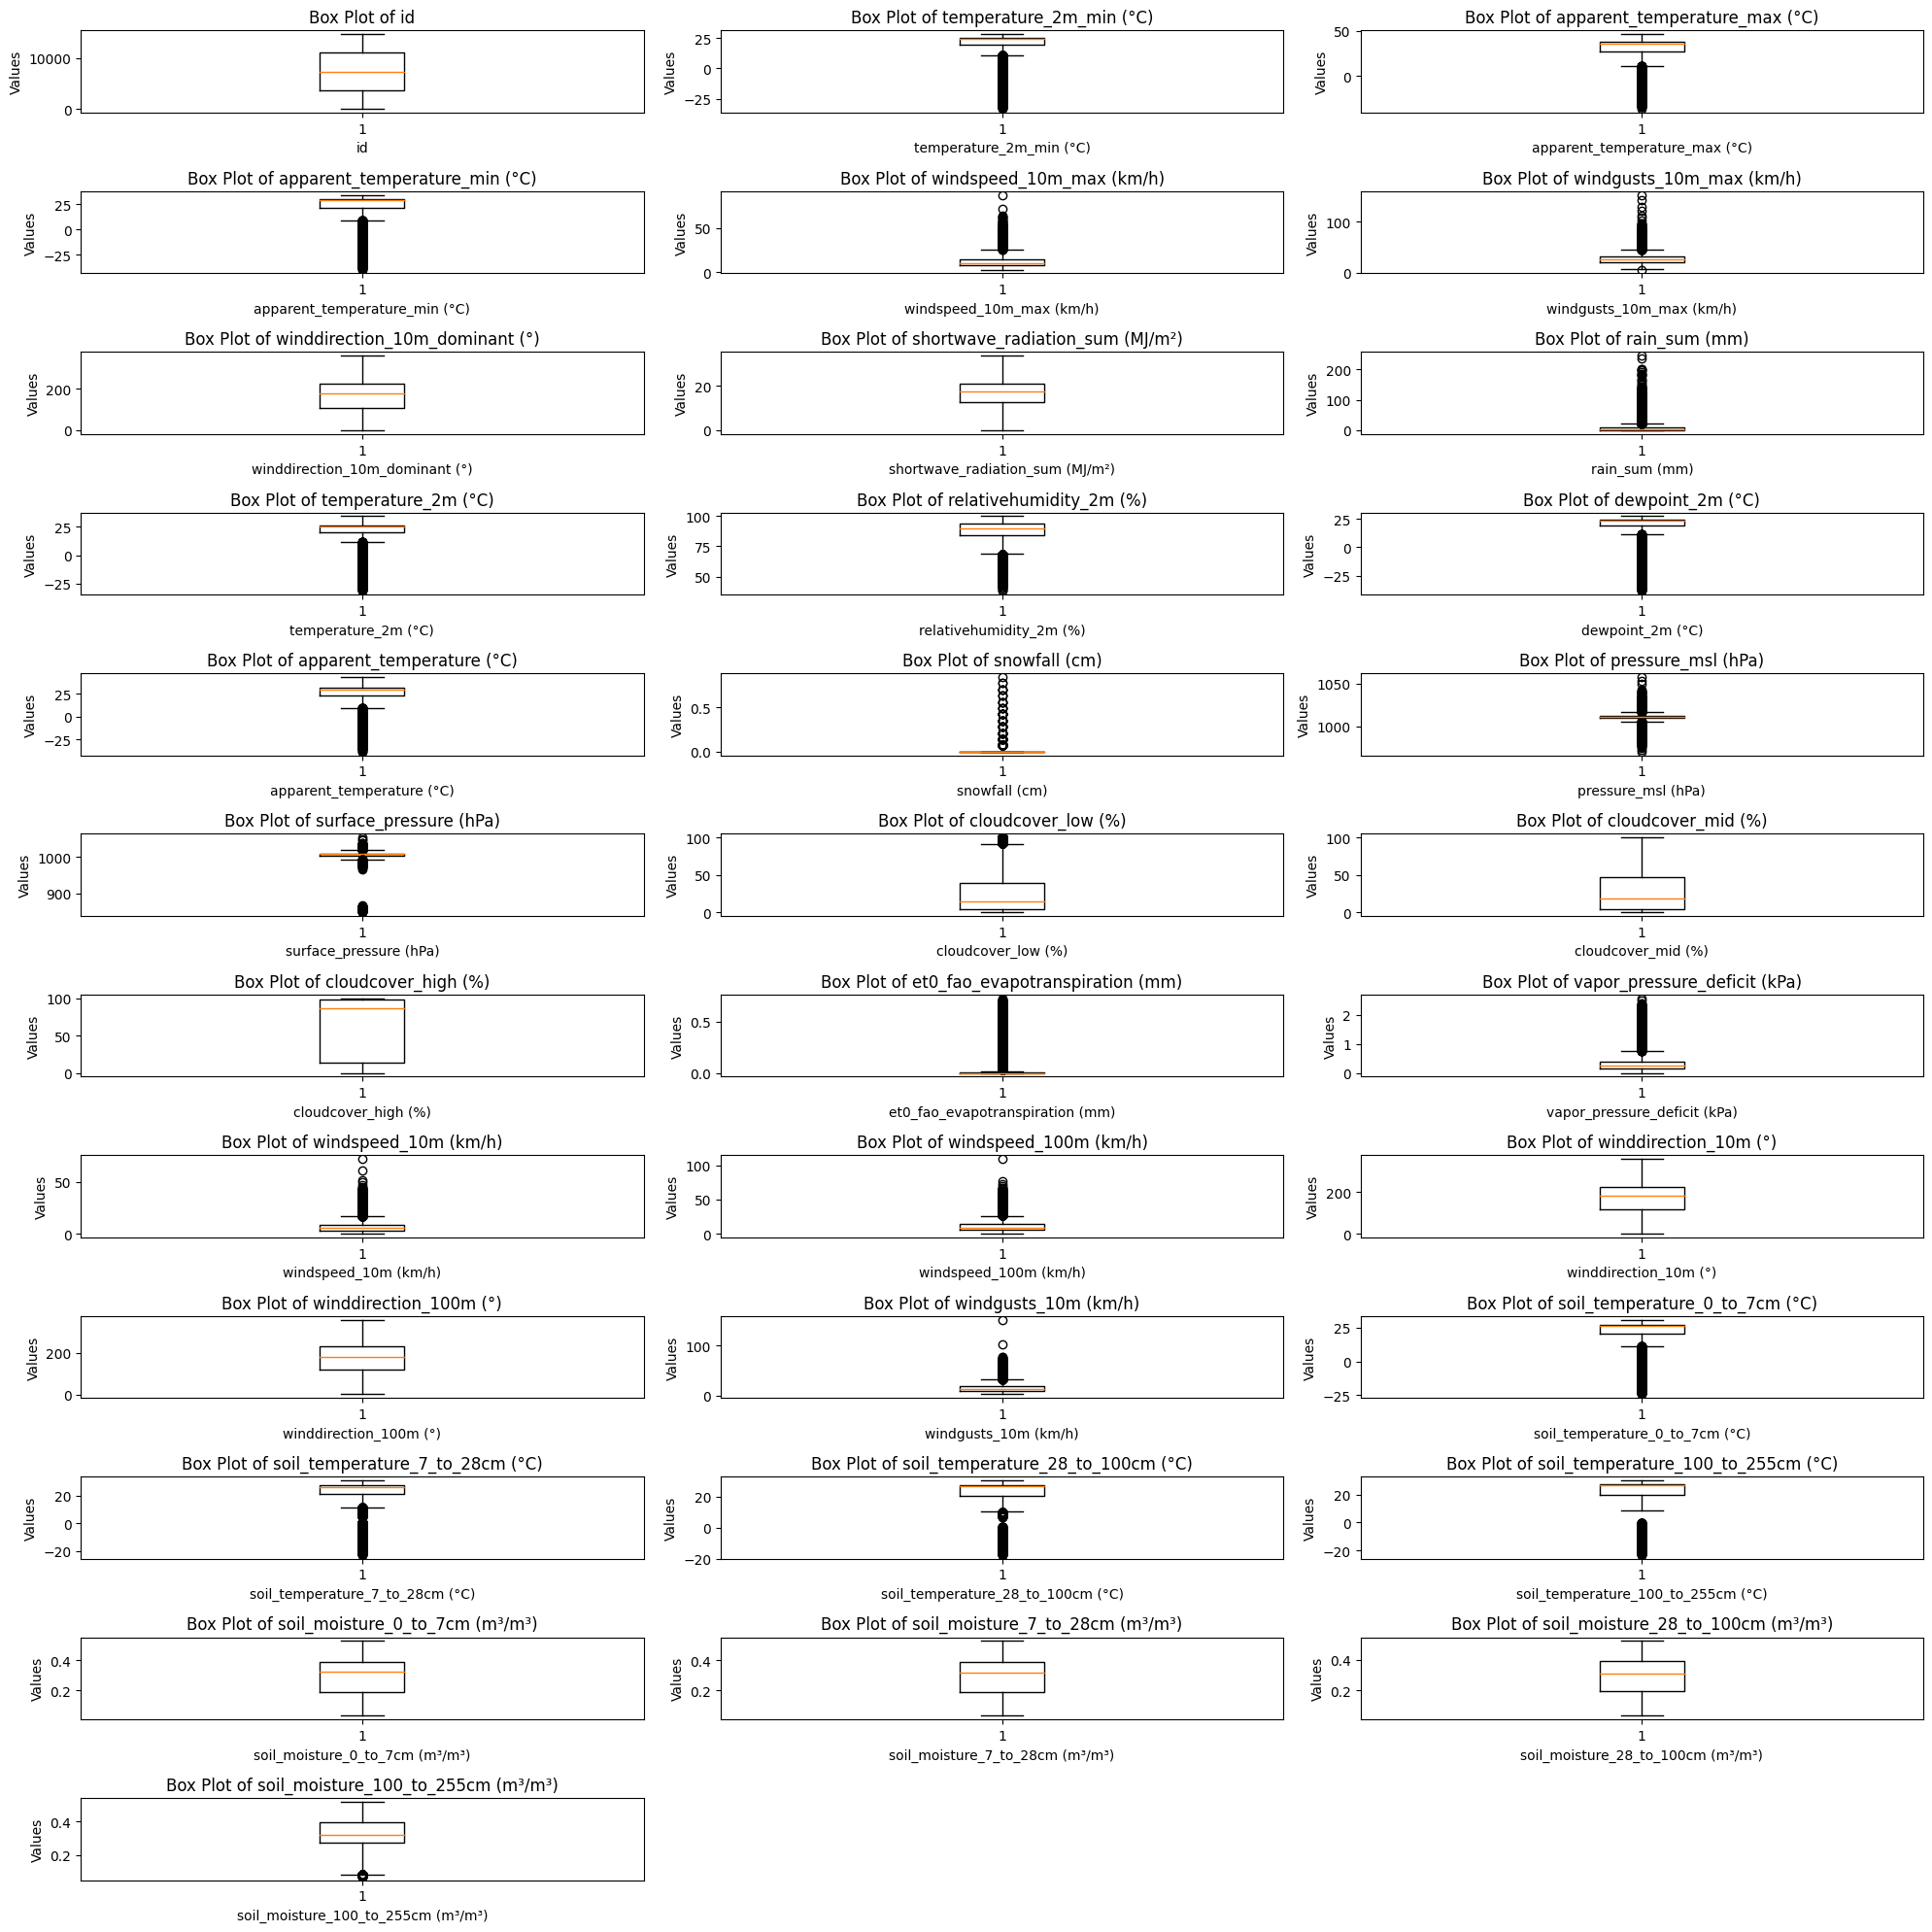

In [ ]:
num_cols = 3
num_rows = (len(num_df.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(num_df.columns):
    axes[i].boxplot(num_df[column])
    axes[i].set_title(f"Box Plot of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Values")

if len(num_df.columns) < num_rows * num_cols:
    for j in range(len(num_df.columns), num_rows * num_cols):
        fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

In [ ]:
def check_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [ ]:
df_outliers = check_outliers(merged_df.select_dtypes(include=[np.number]))
print("Tabel feature beserta jumlah outliernya dengan persentase kolom:\n")
df_outliers

Outlier pada tiap atribut:
id                                       0
temperature_2m_min (°C)               2494
apparent_temperature_max (°C)         1822
apparent_temperature_min (°C)         2433
windspeed_10m_max (km/h)               630
windgusts_10m_max (km/h)               727
winddirection_10m_dominant (°)           0
shortwave_radiation_sum (MJ/m²)          0
rain_sum (mm)                         1130
temperature_2m (°C)                   2346
relativehumidity_2m (%)               1417
dewpoint_2m (°C)                      2594
apparent_temperature (°C)             2233
snowfall (cm)                          180
pressure_msl (hPa)                    1782
surface_pressure (hPa)                3344
cloudcover_low (%)                     920
cloudcover_mid (%)                       0
cloudcover_high (%)                      0
et0_fao_evapotranspiration (mm)       2763
vapor_pressure_deficit (kPa)          1084
windspeed_10m (km/h)                   771
windspeed_100m (km/h)      

,id,temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),rain_sum (mm),temperature_2m (°C),...,winddirection_100m (°),windgusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14725,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14726,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14727,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14728,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Handle Ouliers

In [ ]:
#Do Nothing to Handling Outliers

### Unwantend Words

#### Handle Unwanted Words

In [ ]:
#Menghapus kata yang ambigu pada values agar seragam
def remove_unwanted_words(temperature_2m_max):
    unwanted_words = ['drjt', 'derajat', 'celcius']
    replacement_words = ['', '', '']

    for i in range(len(unwanted_words)):
        temperature_2m_max = temperature_2m_max.replace(unwanted_words[i], replacement_words[i])

    return temperature_2m_max

merged_df['temperature_2m_max (°C)'] = merged_df['temperature_2m_max (°C)'].apply(lambda x: ', '.join(sorted(set([temperature_2m_max.strip().lower() for temperature_2m_max in x.split(',')]))))
merged_df['temperature_2m_max (°C)'] = merged_df['temperature_2m_max (°C)'].apply(remove_unwanted_words)

In [ ]:
unique_names = merged_df['class'].unique()

print(unique_names)

['Hujan Ringan' 'Hujan Sedang' 'Hujan Lebat' 'Tidak Hujan'
 'Hujan Sangat Lebat']


In [ ]:
unique_names = merged_df['temperature_2m_max (°C)'].unique()

print(unique_names)

['33.2' '33.0' '31.3' '31.2' '29.6' '31.1' '30.0' '29.7' '31.0' '30.5'
 '29.4' '28.6' '28.9' '27.5' '29.0' '30.9' '28.1' '30.3' '30.2' '28.7'
 '28.0' '29.9' '30.7' '29.3' '27.8' '28.5' '29.5' '30.1' '29.2' '27.7'
 '30.6' '30.4' '31.9' '31.6' '30.8' '33.1' '31.8' '31.7' '32.1' '29.8'
 '32.6' '31.4' '32.0' '32.5' '32.3' '31.5' '32.8' '32.2' '28.8' '28.4'
 '32.4' '33.4' '32.9' '32.7' '27.2' '34.2' '33.5' '34.5' '33.6' '33.3'
 '33.9' '34.3' '34.4' '33.8' '33.7' '29.1' '27.9' '27.0' '34.6' '34.0'
 '34.7' '35.7' '35.5' '35.0' '27.4' '32.7 ' '32.4 ' '30.8 ' '31.2 '
 '30.9 ' '31.1  ' '32.6 ' '29.8 ' '29.9 ' '27.6' '31.1 ' '32.1 ' '28.8 '
 '29.3 ' '30.1  ' '32.3 ' '26.7' '29.2 ' '27.7 ' '28.3' '28.5 ' '29.5 '
 '28.2' '32.2 ' '31.8 ' '30.2 ' '31.4  ' '31.5 ' '30.6 ' '28.6 ' '30.7 '
 '30.4 ' '31.9 ' '31.7 ' '31.6 ' '32.4  ' '32.5 ' '28.0 ' '31.3 ' '31.4 '
 '29.6 ' '26.9' '31.0 ' '33.1  ' '27.9 ' '32.0 ' '30.7  ' '30.5 ' '-18.5'
 '-19.1 ' '-24.1' '-24.8' '-25.1' '-18.2' '-15.5' '-17.4' '-16.5' '-1

###Data Transformation

#### Transform Datatype

In [ ]:
# Transformasi tipe data kolom time menjadi datetime
merged_df['time'] = pd.to_datetime(merged_df['time'])
merged_df['sunrise (iso8601)'] = pd.to_datetime(merged_df['sunrise (iso8601)'])
merged_df['sunset (iso8601)'] = pd.to_datetime(merged_df['sunset (iso8601)'])

In [ ]:
# Transformasi tipe data kolom time menjadi datetime
merged_test['time'] = pd.to_datetime(merged_test['time'])
merged_test['sunrise (iso8601)'] = pd.to_datetime(merged_test['sunrise (iso8601)'])
merged_test['sunset (iso8601)'] = pd.to_datetime(merged_test['sunset (iso8601)'])

In [ ]:
# Transformasi tipe data kolom 'temperatur' menjadi float
merged_df['temperature_2m_max (°C)'] = merged_df['temperature_2m_max (°C)'].astype(float)

In [ ]:
check_values(merged_df)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.0,14730,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,time,datetime64[ns],0,0.0,1473,"[2018-01-01T00:00:00.000000000, 2018-01-02T00:..."
2,temperature_2m_max (°C),float64,0,0.0,625,"[33.2, 33.0, 31.3, 31.2, 29.6, 31.1, 30.0, 29...."
3,temperature_2m_min (°C),float64,0,0.0,586,"[24.3, 25.1, 24.9, 25.9, 25.4, 24.7, 25.3, 23...."
4,apparent_temperature_max (°C),float64,0,0.0,761,"[39.0, 40.0, 38.3, 37.8, 34.3, 35.7, 34.6, 36...."
5,apparent_temperature_min (°C),float64,0,0.0,701,"[28.8, 29.2, 30.3, 31.8, 29.6, 28.5, 29.5, 30...."
6,sunrise (iso8601),datetime64[ns],0,0.0,13917,"[2018-01-01T05:41:14.000000000, 2018-01-02T05:..."
7,sunset (iso8601),datetime64[ns],0,0.0,13881,"[2018-01-01T18:09:47.000000000, 2018-01-02T18:..."
8,windspeed_10m_max (km/h),float64,0,0.0,442,"[10.8, 9.5, 11.1, 11.0, 17.3, 16.1, 15.0, 14.1..."
9,windgusts_10m_max (km/h),float64,0,0.0,231,"[23.0, 19.4, 23.8, 31.7, 33.1, 38.9, 29.5, 29...."


In [ ]:
check_values(merged_test)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.0,5460,"[14730, 14731, 14732, 14733, 14734, 14735, 147..."
1,time,datetime64[ns],0,0.0,546,"[2022-01-01T00:00:00.000000000, 2022-01-02T00:..."
2,temperature_2m_max (°C),float64,0,0.0,540,"[32.2, 31.4, 32.7, 31.6, 30.7, 32.5, 31.3, 30...."
3,temperature_2m_min (°C),float64,0,0.0,502,"[24.9, 24.4, 23.0, 24.5, 24.7, 24.1, 24.6, 25...."
4,apparent_temperature_max (°C),float64,0,0.0,647,"[37.8, 37.1, 39.2, 38.8, 37.5, 37.4, 37.6, 37...."
5,apparent_temperature_min (°C),float64,0,0.0,607,"[29.1, 28.9, 26.9, 28.6, 29.3, 30.2, 28.8, 29...."
6,sunrise (iso8601),datetime64[ns],0,0.0,5153,"[2022-01-01T05:41:13.000000000, 2022-01-02T05:..."
7,sunset (iso8601),datetime64[ns],0,0.0,5153,"[2022-01-01T18:09:45.000000000, 2022-01-02T18:..."
8,windspeed_10m_max (km/h),float64,0,0.0,360,"[13.0, 13.2, 8.9, 8.4, 10.5, 12.9, 15.1, 12.2,..."
9,windgusts_10m_max (km/h),float64,0,0.0,187,"[34.2, 30.2, 18.4, 19.1, 20.2, 25.9, 29.9, 24...."


### Splitting Datetime

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

# Membuat fungsi untuk mengevaluasi performa model
def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
def split_datetime(df):
  for (columnName, columnData) in df.items():
    if columnData.dtype == 'datetime64[ns]':
      df[columnName + '_year'] = df[columnName].dt.year
      df[columnName + '_month'] = df[columnName].dt.month
      df[columnName + '_day'] = df[columnName].dt.day

      # Drop the original datetime features.
      dropped_dates = [
          'time',
          'sunset (iso8601)',
          'sunrise (iso8601)'
      ]

      df.drop(dropped_dates, axis=1, inplace = True)

  return df

In [ ]:
# Split datetime features harian to new columns by year, month, day, hour, minute and second.
# df_model_test = merged_test.copy()

# df_model_test['time_year'] = df_model_test['time'].dt.year
# df_model_test['time_month'] = df_model_test['time'].dt.month
# df_model_test['time_day'] = df_model_test['time'].dt.day

# df_model_test['sunrise_year'] = df_model_test['sunrise (iso8601)'].dt.year
# df_model_test['sunrise_month'] = df_model_test['sunrise (iso8601)'].dt.month
# df_model_test['sunrise_day'] = df_model_test['sunrise (iso8601)'].dt.day

# df_model_test['sunset_year'] = df_model_test['sunset (iso8601)'].dt.year
# df_model_test['sunset_month'] = df_model_test['sunset (iso8601)'].dt.month
# df_model_test['sunset_day'] = df_model_test['sunset (iso8601)'].dt.day

In [ ]:
try:
  df_model = split_datetime(merged_df)
except:
  df_model = split_datetime(merged_df)

try:
  df_model_test = split_datetime(merged_test)
except:
  df_model_test = split_datetime(merged_test)

### Encoding of Categorical Features

In [ ]:
# Encoding of categorical features.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_model['city'] = le.fit_transform(df_model['city'])
df_model['class'] = le.fit_transform(df_model['class'])

###Split Data Train and Test

In [ ]:
# Spliting data to training and testing.
from sklearn.model_selection import train_test_split

x_regression = df_model.drop(['class', 'rain_sum (mm)', 'id'], axis=1)
y_regression = df_model['rain_sum (mm)']

x_classification = df_model.drop(['class', 'rain_sum (mm)','id'], axis=1)
y_classification = df_model['class']

In [ ]:
# Spliting data to training and testing.
from sklearn.model_selection import train_test_split

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_regression, y_regression, test_size = 0.20, random_state = 42)
x_train_clas, x_test_clas, y_train_clas, y_test_clas = train_test_split(x_classification, y_classification, test_size = 0.20, random_state = 42)

### Imbalanced Data

<Axes: xlabel='class', ylabel='count'>

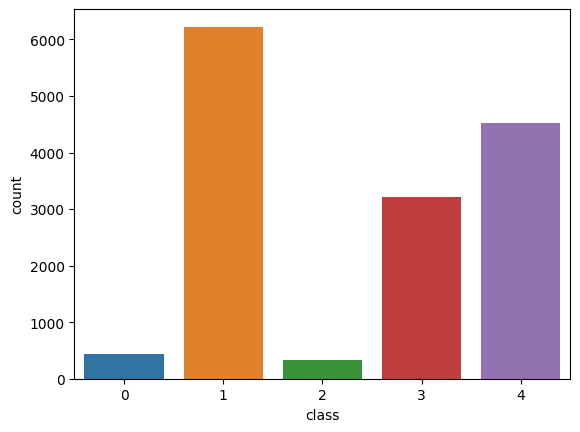

In [ ]:
sns.countplot(x='class', data=df_model)

#### Oversampling

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

# Inisiasi oversampler dengan metode Borderline SMOTE
borderline_smote = BorderlineSMOTE()

# Melakukan resampling
X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(x_train_clas, y_train_clas)

# Melihat distribusi kelas pada dataset
counter_y_borderline_smote = Counter(y_borderline_smote)
print(counter_y_borderline_smote)

Counter({4: 5017, 1: 5017, 3: 5017, 0: 5017, 2: 5017})


###Feature Selection (Filter)

#### Classification SFS

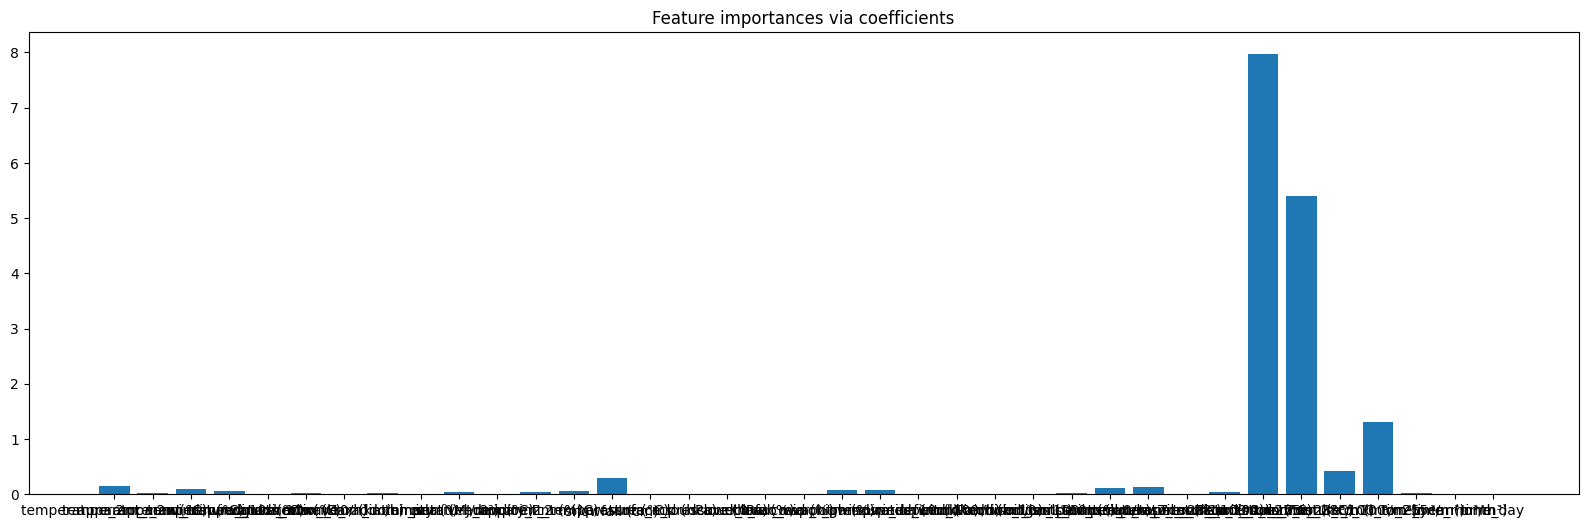

In [ ]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x_train_clas, y_train_clas)
importance = np.abs(ridge.coef_)
feature_names = np.array(X_borderline_smote.columns)
plt.figure(figsize=(20, 6))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_forward_clas = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="forward"
).fit(x_train_clas, y_train_clas)

sfs_backward_clas = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="backward"
).fit(x_train_clas, y_train_clas)

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward_clas.get_support()]}"
)
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward_clas.get_support()]}"
)

Features selected by forward sequential selection: ['temperature_2m_max (°C)' 'apparent_temperature_max (°C)'
 'apparent_temperature_min (°C)' 'windgusts_10m_max (km/h)'
 'shortwave_radiation_sum (MJ/m²)' 'relativehumidity_2m (%)'
 'apparent_temperature (°C)' 'soil_moisture_0_to_7cm (m³/m³)'
 'soil_moisture_7_to_28cm (m³/m³)' 'soil_moisture_100_to_255cm (m³/m³)']
Features selected by backward sequential selection: ['temperature_2m_max (°C)' 'apparent_temperature_max (°C)'
 'apparent_temperature_min (°C)' 'windgusts_10m_max (km/h)'
 'surface_pressure (hPa)' 'cloudcover_mid (%)'
 'soil_temperature_0_to_7cm (°C)' 'soil_temperature_7_to_28cm (°C)'
 'soil_moisture_0_to_7cm (m³/m³)' 'soil_moisture_7_to_28cm (m³/m³)']


In [ ]:
from sklearn.preprocessing import StandardScaler
# scaling
scaler_clas = StandardScaler()
X_sffs_clas = scaler_clas.fit_transform(x_train_clas[feature_names[sfs_forward_clas.get_support()]])
X_sffs_clas

array([[ 0.13802147,  0.13036744,  0.39072926, ..., -1.91068791,
        -1.83271937, -1.77216918],
       [-1.30509688, -1.58152091, -1.31009953, ..., -1.2099531 ,
        -1.32121096, -1.35853411],
       [ 0.09582503,  0.12395587,  0.28908611, ..., -1.83452108,
        -1.76501973, -1.89148699],
       ...,
       [ 0.19709649,  0.30347974,  0.41105789, ...,  0.84655124,
         0.8376554 ,  0.51077824],
       [ 0.53466803,  0.61764652,  0.64144904, ...,  0.31338345,
         0.23588081,  0.0732796 ],
       [ 0.62750021,  0.66252749,  0.52625347, ..., -0.21216766,
        -0.14022832, -0.33240095]])

#### Regression SFS

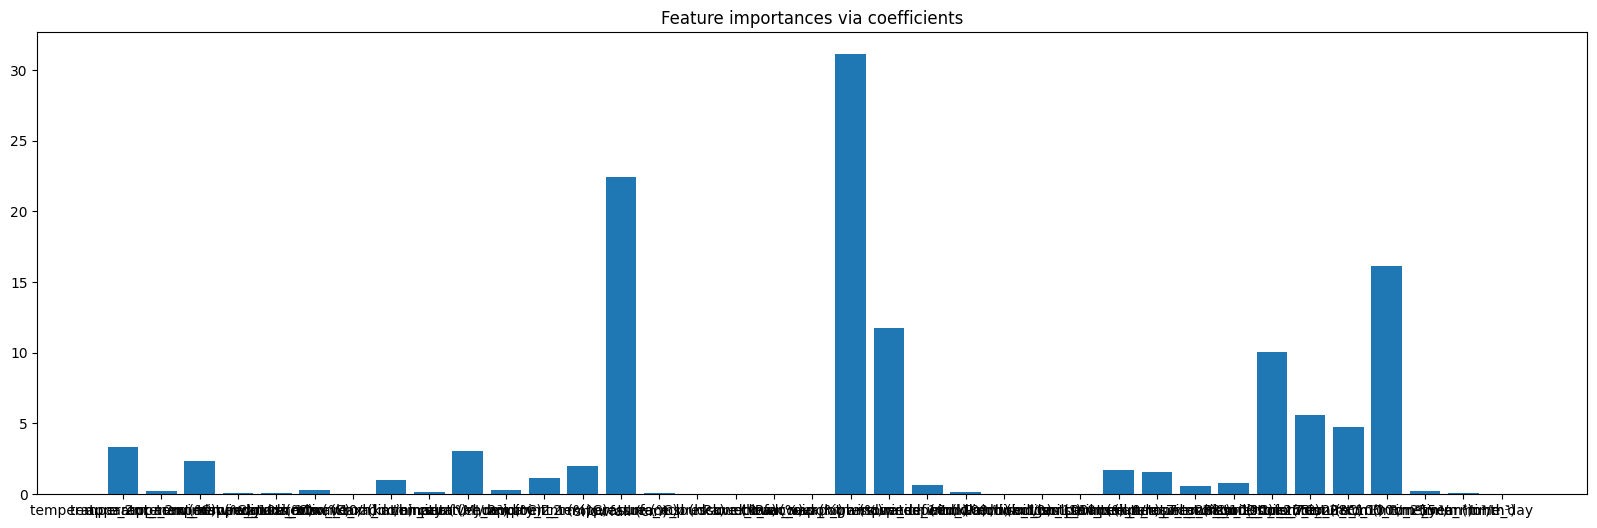

In [ ]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x_train_reg, y_train_reg)
importance = np.abs(ridge.coef_)
feature_names = np.array(x_train_reg.columns)
plt.figure(figsize=(20, 6))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=8, direction="forward"
).fit(x_train_reg, y_train_reg)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=8, direction="backward"
).fit(x_train_reg, y_train_reg)

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)

Features selected by forward sequential selection: ['temperature_2m_max (°C)' 'apparent_temperature_max (°C)'
 'windgusts_10m_max (km/h)' 'shortwave_radiation_sum (MJ/m²)'
 'temperature_2m (°C)' 'dewpoint_2m (°C)' 'cloudcover_low (%)'
 'soil_moisture_0_to_7cm (m³/m³)']
Features selected by backward sequential selection: ['temperature_2m_max (°C)' 'apparent_temperature_max (°C)'
 'windgusts_10m_max (km/h)' 'shortwave_radiation_sum (MJ/m²)'
 'temperature_2m (°C)' 'et0_fao_evapotranspiration (mm)'
 'vapor_pressure_deficit (kPa)' 'windspeed_10m (km/h)']


In [ ]:
from sklearn.preprocessing import StandardScaler
# scaling
scaler_reg = StandardScaler()
X_sffs = scaler_reg.fit_transform(x_train_reg[feature_names[sfs_forward.get_support()]])
X_sffs

array([[ 0.13802147,  0.13036744, -0.14719889, ...,  0.44238669,
        -0.66354195, -1.91068791],
       [-1.30509688, -1.58152091,  0.7893133 , ..., -1.1773891 ,
        -0.86284723, -1.2099531 ],
       [ 0.09582503,  0.12395587,  0.28581212, ...,  0.26614165,
         1.1634232 , -1.83452108],
       ...,
       [ 0.19709649,  0.30347974, -0.76147034, ...,  0.44238669,
         2.060297  ,  0.84655124],
       [ 0.53466803,  0.61764652, -0.00621856, ...,  0.54309814,
        -0.6303244 ,  0.31338345],
       [ 0.62750021,  0.66252749, -0.62049   , ...,  0.50113503,
        -0.82962969, -0.21216766]])

## Classification

###Random Forest

In [ ]:
# x_test_clas_ready = scaler_pca.transform(x_test_clas)
# x_test_clas_ready = pca.transform(x_test_clas_ready)

x_test_clas_ready = scaler_clas.fit_transform(x_test_clas[feature_names[sfs_forward_clas.get_support()]])

In [ ]:
X_sffs_clas.shape

(11784, 10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training of random forest model.
rf_clas = RandomForestClassifier()
rf_clas.fit(X_sffs_clas, y_train_clas)

# Predicting of test data.
y_pred_clas = rf_clas.predict(x_test_clas_ready)

# Evaluation of random forest model.
evaluate_classifier_performance(y_pred_clas, y_test_clas)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.20      0.02      0.04        87
           1       0.63      0.77      0.69      1207
           2       0.40      0.30      0.34        61
           3       0.59      0.50      0.54       660
           4       0.84      0.76      0.80       931

    accuracy                           0.68      2946
   macro avg       0.53      0.47      0.48      2946
weighted avg       0.67      0.68      0.67      2946



Confusion Matrix



prediction,0,1,2,3,4
actual,,,,,
0,2,21,7,57,0
1,1,934,3,133,136
2,6,4,18,33,0
3,1,312,17,328,2
4,0,218,0,3,710




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.6761710794297352
F1 Macro Average: 0.4824603536121977
F1 Micro Average: 0.6761710794297352
Precision Macro Average: 0.5313177069140274
Precision Micro Average: 0.6761710794297352
Recall Macro Average: 0.47029607892968783
Recall Micro Average: 0.6761710794297352



### Predict Classification Test Data

In [ ]:
df_model_test['city'] = le.fit_transform(df_model_test['city'])
classification_X = scaler_clas.transform(df_model_test[feature_names[sfs_forward_clas.get_support()]])

In [ ]:
# Melakukan prediksi
classification_pred = rf_clas.predict(classification_X)
classification_pred

array([1, 1, 4, ..., 2, 2, 2])

## Regression

### Random Forest Regressor

In [ ]:
# x_test_reg_ready = scaler_pca.transform(x_test_reg)
# x_test_reg_ready = pca.transform(x_test_reg_ready)

x_test_reg_ready = scaler_reg.fit_transform(x_test_reg[feature_names[sfs_forward.get_support()]])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Membuat model regresi linear
rf_reg = RandomForestRegressor()

# Melatih model pada data training yang telah distandarisasi
rf_reg.fit(X_sffs, y_train_reg)

# Melakukan prediksi pada data testing yang telah distandarisasi
y_pred_reg = rf_reg.predict(x_test_reg_ready)

# Menampilkan hasil prediksi pada keseluruhan data uji
print("Hasil Prediksi pada Keseluruhan Data Uji:")
df_test = pd.DataFrame({'Actual': y_test_reg, 'Predicted': y_pred_reg})
df_test

Hasil Prediksi pada Keseluruhan Data Uji:


,Actual,Predicted
4742,0.700000,3.055000
9226,6.900000,7.037000
8951,1.200000,8.170000
12898,0.300000,6.475000
2596,0.000000,0.000000
...,...,...
10566,133.499980,35.553999
9020,0.000000,0.211000
2640,0.000000,0.000000
1250,3.600000,5.934000


In [ ]:
# Mengukur performa model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("\nMetrik Performa Model:")
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Metrik Performa Model:
Mean Squared Error (MSE): 109.87051440958442
R-squared (R2): 0.39536478568544986


### Predict Test Data

In [ ]:
df_model_test['city'] = le.fit_transform(df_model_test['city'])
regression_X = scaler_reg.transform(df_model_test[feature_names[sfs_forward.get_support()]])

In [ ]:
# Melakukan prediksi
regression_pred = rf_reg.predict(regression_X)
regression_pred

array([ 1.89100001,  6.63600001,  1.418     , ..., 42.75900141,
       57.7849998 , 43.695001  ])

##Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

X = df_model[['snowfall (cm)', 'relativehumidity_2m (%)', 'et0_fao_evapotranspiration (mm)']]

In [ ]:
kmeans = KMeans(n_clusters=10)

cluster_assignment = kmeans.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy(), columns=('snowfall (cm)', 'relativehumidity_2m (%)', 'et0_fao_evapotranspiration (mm)'))
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,snowfall (cm),relativehumidity_2m (%),et0_fao_evapotranspiration (mm),Clusters
0,0.0,91.0,0.00,0
1,0.0,86.0,0.01,2
2,0.0,89.0,0.00,7
3,0.0,92.0,0.00,0
4,0.0,88.0,0.00,7
...,...,...,...,...
14725,0.0,77.0,0.00,5
14726,0.0,62.0,0.00,6
14727,0.0,76.0,0.00,5
14728,0.0,80.0,0.00,9


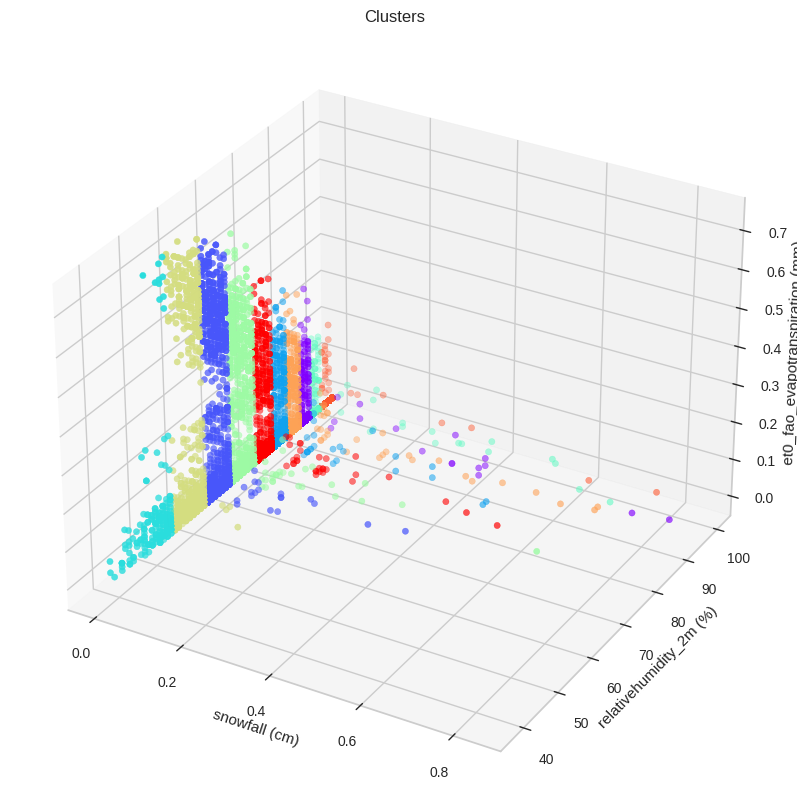

In [ ]:
# Create figure
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

# Prepare data
x = data_with_clusters['snowfall (cm)']
y = data_with_clusters['relativehumidity_2m (%)']
z = data_with_clusters['et0_fao_evapotranspiration (mm)']
cluster = data_with_clusters['Clusters']

# Create plot
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Clusters")
ax.set_xlabel('snowfall (cm)')
ax.set_ylabel('relativehumidity_2m (%)')
ax.set_zlabel('et0_fao_evapotranspiration (mm)')

# Show plot
plt.show()

##Submission

###Classification

In [ ]:
mapping = {
    0 : 'Hujan Lebat',
    1 : 'Hujan Ringan',
    2 : 'Hujan Sangat Lebat',
    3 : 'Hujan Lebat',
    4 : 'Tidak Hujan'
}

string_array = [mapping[value] for value in classification_pred]

In [ ]:
submit_classification = pd.DataFrame({'id': df_model_test['id'],
                   'class': string_array})

In [ ]:
submit_classification.to_csv('MC_Classification.csv', sep=',', index=False, encoding='utf-8')

###Regression

In [ ]:
submit_regression = pd.DataFrame({'id': merged_test['id'],
                   'rain_sum (mm)': regression_pred})

In [ ]:
submit_regression.to_csv('MC_regression.csv', sep=',', index=False, encoding='utf-8')